0.5083333333333335
Amount of Positive tweets: 3.0
Amount of Negative tweets: 4.0
Amount of Neutral tweets: 7.0
['negative', 'neutral', 'positive']
               User                                              Tweet  \
0      ShalaSalazar   #twittersold costs musk $44 billion to feed h...   
1      techranger58   #twittersold costs musk $44 billion to feed h...   
2      notminenoway   #twittersold costs musk $44 billion to feed h...   
3   unknown36852175   i hope that even my worst critics remain on t...   
4         chuck8708   amazon added to cart😂\n#elonmuskbuytwitter #e...   
5         mcbuncart   after #twittersold for $44 billion to elon mu...   
6        sararosenm     i think might start…. tweeting. 🫣 #twittersold   
7      urbanmowgli_                         bahot paisa🥹#twittersold     
8        K_h_a_n___   ᵇᵉ ᵖᵃᵗⁱᵉⁿᵗ ʷⁱᵗʰ ʸᵒᵘʳ\n  ˡⁱᶠᵉ ᵃⁿᵈ ʸᵒᵘʳ ᵖᵃᵗʰ.\n...   
9          K__h_a_n   ᵇᵉ ᵖᵃᵗⁱᵉⁿᵗ ʷⁱᵗʰ ʸᵒᵘʳ\n  ˡⁱᶠᵉ ᵃⁿᵈ ʸᵒᵘʳ ᵖᵃᵗʰ.\n...   
10        raj143ver   elon musk ki sala

C:\Users\SHREESHA\AppData\Local\Temp/ipykernel_14860/3726430549.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_df['Emotion'][i] = 'anger'
C:\Users\SHREESHA\AppData\Local\Temp/ipykernel_14860/3726430549.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_df['Emotion'][i]= 'optimism'
C:\Users\SHREESHA\AppData\Local\Temp/ipykernel_14860/3726430549.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_df['E

Vectoriser fitted.
No. of feature_words:  209
Data Transformed.


Bernoulli Classification Report: 
               precision    recall  f1-score   support

         joy       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix: 
 [[1]]
Accuracy Score: 
 1.0


KNN Classification Report: 
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       0.0
         joy       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix: 
 [[0 0]
 [1 0]]
Accuracy Score: 
 0.0


Decision Tree Classification Report: 
               precision    recall  f1-score   support

         joy       1.00      1.00      1.00         1

    accuracy

C:\Users\SHREESHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHREESHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHREESHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHREESHA\anaconda3\lib\site-packages\sklearn\

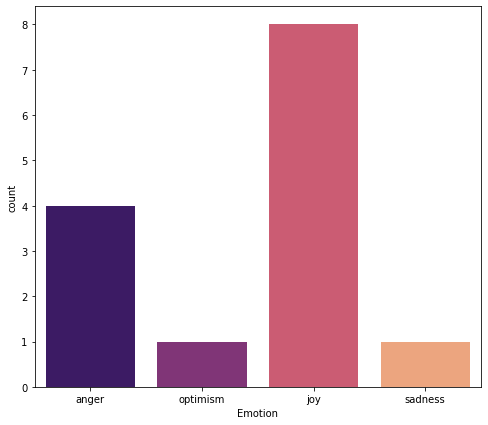

In [3]:
from textblob import TextBlob
import tweepy
import configparser
import datetime
import sys
import re
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

import nltk
from nltk.stem import WordNetLemmatizer

api_key = 'rgGB64oTvU6WMCFNX7Pyxue5r'
api_key_secret = 'yGhVDdCWIVhps9IhAofymshhIbQuC9gmwAR86mQXk7dWiWl42X'

access_token = '1520724296070758400-M1OCv9vcaELtojfbHZDDJRhLmODtQG'
access_token_secret = 'RjRAZf7YdvNOypq7yG0673l1S2N5IWIRks2pmgKgqLMiv'

# authentication
auth_handler = tweepy.OAuthHandler(api_key, api_key_secret)
auth_handler.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler)

start_date = datetime.datetime(2022, 4, 14)
end_date = datetime.datetime(2022, 4, 20)
term="twittersold"
limit=100
public_tweets = tweepy.Cursor(api.search_tweets,q=term).items(limit)

polarity = 0.0
positive = 0.0
negative = 0.0
neutral = 0.0
# create dataframe
columns = ['User', 'Tweet', 'class']
data = []

for tweet in public_tweets:
    analysis = TextBlob(tweet.text) 
    tweet_polarity = analysis.polarity 
    if tweet_polarity > 0:
        positive += 1 
        data.append([tweet.user.screen_name, tweet.text,'POSITIVE'])
        #print('pos')
    elif tweet_polarity < 0 :
        negative +=1
        data.append([tweet.user.screen_name, tweet.text,'NEGATIVE'])
        #print('neg')
    else:
        neutral +=1
        data.append([tweet.user.screen_name, tweet.text,'NEUTRAL'])
        #print('neu')
    polarity += analysis.polarity

print(polarity)
print(f'Amount of Positive tweets: {positive}')
print(f'Amount of Negative tweets: {negative}')
print(f'Amount of Neutral tweets: {neutral}')


tw_list= pd.DataFrame(data, columns=columns)
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
#tw_list['Tweet'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @[\w]*: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",x)
tw_list['Tweet'] = tw_list.Tweet.map(remove_rt).map(rt)
tw_list['Tweet'] = tw_list.Tweet.str.lower()
tw_list.to_csv('tweets3.csv') 

import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment").to(device)
import urllib
import csv
import numpy as np
labels=[]
task = 'sentiment'
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
print(labels)

from scipy.special import softmax
BATCH_SIZE = 10
sentiment_df=tw_list
scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['Tweet'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, max_length=512,truncation=True).to(device)
        output = model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()
    

sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)
#print(sentiment_df)

from textblob import TextBlob
def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

sentiment_df['sentiment'] = sentiment_df['Tweet'].apply(get_sentiment)
sentiment_df['polarity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df['subjectivity'] = sentiment_df['sentiment'].apply(lambda x:x[0])
sentiment_df.drop('sentiment', axis=1, inplace=True)

emotion_tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
emotion_model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion").to(device)
task='emotion'
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
BATCH_SIZE = 10

scores_all = np.empty((0,len(labels)))
text_all = sentiment_df['Tweet'].to_list()
n = len(text_all)
with torch.no_grad():
    for start_idx in range(0, n, BATCH_SIZE):
        end_idx = min(start_idx+BATCH_SIZE, n)
        encoded_input = tokenizer(text_all[start_idx:end_idx], return_tensors='pt', padding=True, max_length=512,truncation=True).to(device)
        output = emotion_model(**encoded_input)
        scores = output[0].detach().cpu().numpy()
        scores = softmax(scores, axis=1)
        scores_all = np.concatenate((scores_all, scores), axis=0)
        del encoded_input, output, scores
        torch.cuda.empty_cache()
    
sentiment_df[labels] = pd.DataFrame(scores_all, columns=labels)
#print(sentiment_df)
emotion_df=sentiment_df
emotion_df.drop(['negative','positive','neutral','polarity','subjectivity'], axis=1, inplace=True)
emotion_df.insert(7, "Emotion", '')
for i in range(len(emotion_df)):
  if emotion_df['anger'][i] > emotion_df['joy'][i] and emotion_df['anger'][i] > emotion_df['optimism'][i] and emotion_df['anger'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i] = 'anger'
  elif emotion_df['joy'][i] > emotion_df['anger'][i] and emotion_df['joy'][i] > emotion_df['optimism'][i] and emotion_df['joy'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i]= 'joy'
  elif emotion_df['optimism'][i] > emotion_df['anger'][i] and emotion_df['optimism'][i] > emotion_df['joy'][i] and emotion_df['optimism'][i] > emotion_df['sadness'][i]:
    emotion_df['Emotion'][i]= 'optimism'
  else:
    emotion_df['Emotion'][i] = 'sadness'

emotion_df.drop(['anger','joy','optimism','sadness'], axis=1, inplace=True)
#graph
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (8,7))
sns.countplot(x="Emotion", data=emotion_df, palette='magma')

def preprocess(textdata):
    processedText = []
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    for tweet in textdata:
        tweetwords = ''
        for word in tweet.split():
             # Checking if the word is a stopword.
             #if word not in stopwordlist:
             if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

#Accuracy and Confusion Matrix
processedtext = preprocess(emotion_df['Tweet'])
dataset = emotion_df[['Emotion','Tweet']]
text, emotion = list(dataset['Tweet']), list(dataset['Emotion'])
X_train, X_test, y_train, y_test = train_test_split(processedtext, emotion,test_size = 0.05, random_state = 0)
print(f'Data Split done.')
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

#EVALUATION
    #Bernoulli
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
ys_predict = BNBmodel.predict(X_test)
#Display the outcome of classification
print('\n\nBernoulli Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

    #KNN
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('\n\nKNN Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

    #Decision Tree
DTCModel = DecisionTreeClassifier(random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('\n\nDecision Tree Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))